Topics Covered:
- Applying Matrices
- Affine Transformations
- Eigenvectors
- Eigenvalues
- Matrix Determinants
- Matrix Decomposition
- Applications of Eigendecomposition

## Affine Transformation via Matrix Application

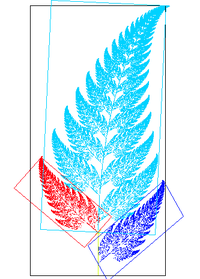
An image of a fern-like fractal (Barnsley's fern) that exhibits affine self-similarity. Each of the leaves of the fern is related to each other leaf by an affine transformation. For instance, the red leaf can be transformed into both the dark blue leaf and any of the light blue leaves by a combination of reflection, rotation, scaling, and translation.

- preserves lines and parallelism
- but does not not necessarily preseve Euclidean distances and angles

Let's say we have a vector v:

In [157]:
import numpy as np
v = np.array([3, 1])
v

array([3, 1])

In [158]:
import matplotlib.pyplot as plt

In [159]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [160]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [161]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [162]:
v == Iv

array([ True,  True])

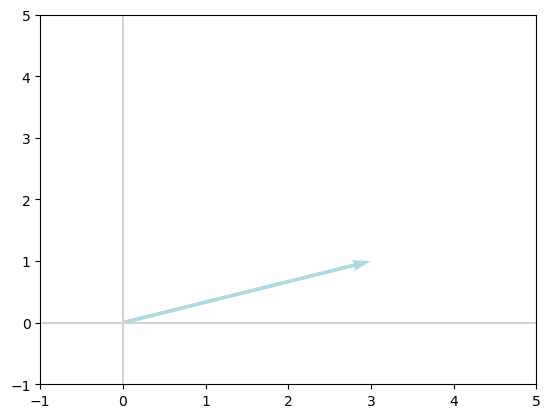

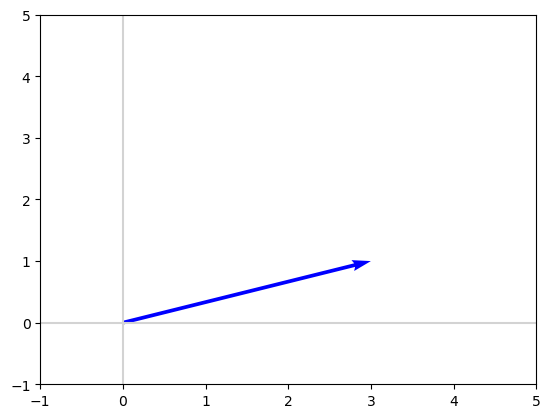

In [163]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)
plot_vectors([Iv], ['blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, consider this matrix (let's call it E
) that flips vectors over the 
-axis:

In [164]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [165]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

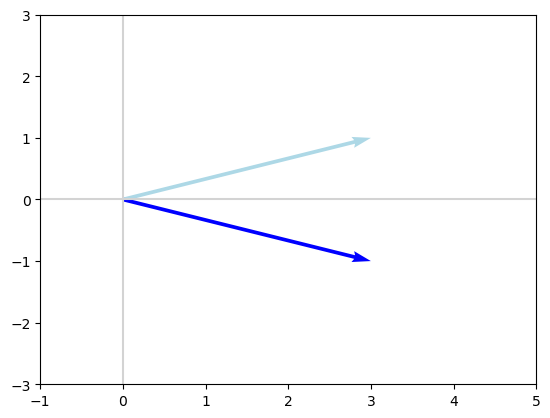

In [166]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, F
, which flips vectors over the 
-axis:

In [14]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [15]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

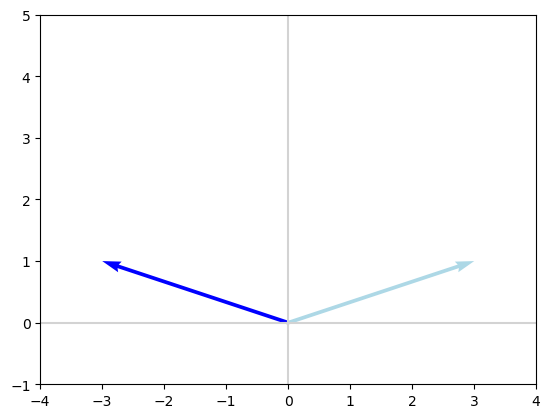

In [16]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

- __Scaling__
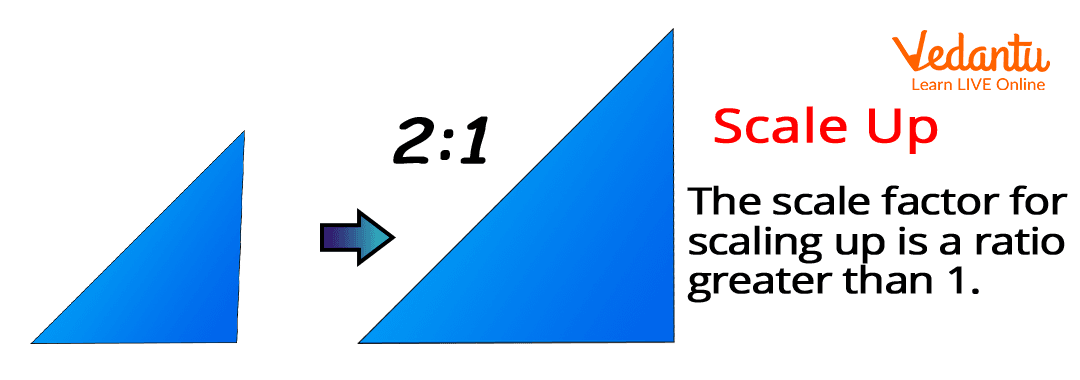

- __Shearing__
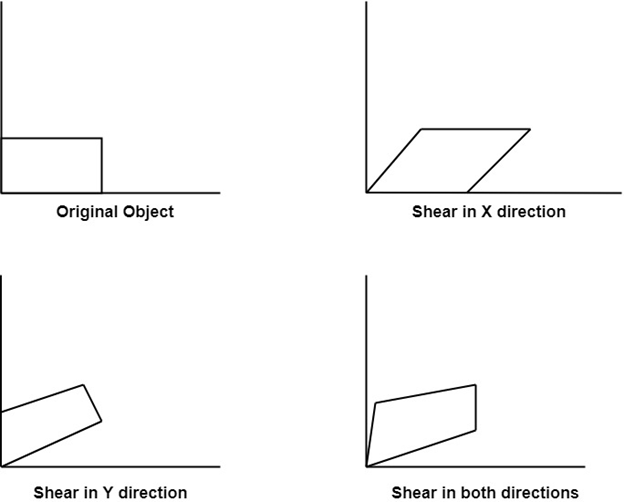

- __Rotation__
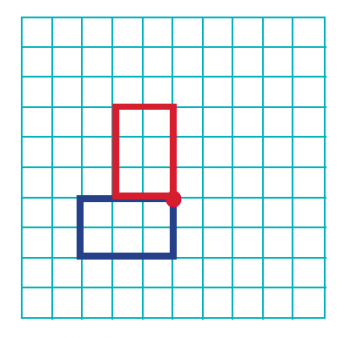

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix A
 to the vector v
:

In [17]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [18]:
Av = np.dot(A, v)
Av

array([1, 4])

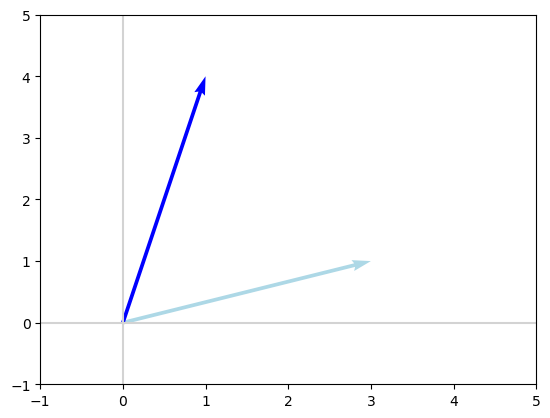

In [19]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

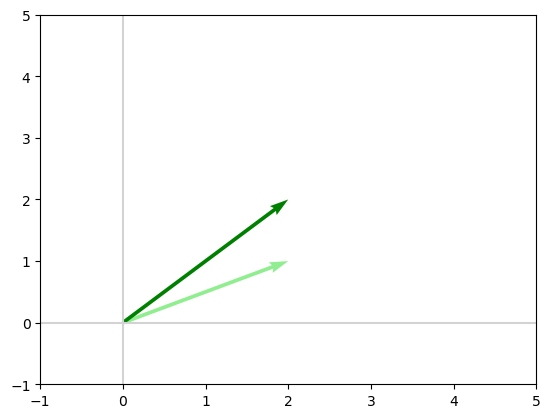

In [20]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, V
), where each column is a separate vector. Then, whatever linear transformations we apply to V
 will be independently applied to each column (vector):

In [21]:
v

array([3, 1])

In [22]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [23]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [24]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [25]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [26]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [27]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [28]:
vectorfy(V, 0)

array([3, 1])

In [29]:
vectorfy(V, 0) == v

array([ True,  True])

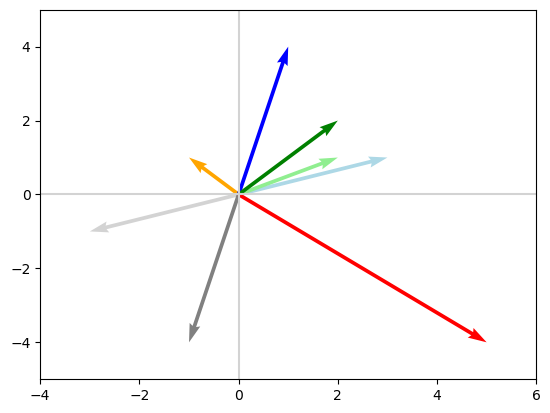

In [30]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

## Eigenvectors, Eigenvalues
- Consider some linear transformation like the one shown below
- it moves i hat to coordinates 3,0 and j hat to coordinates 1,2

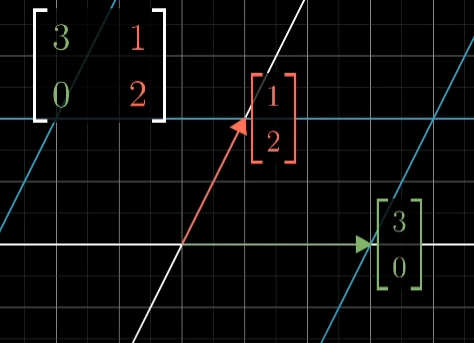

- focus in on what it does to a particular vector, and think about the span of that vector (the line passing through its orgin and its tip)
- most vectors are going to be knocked off their span during the transformation

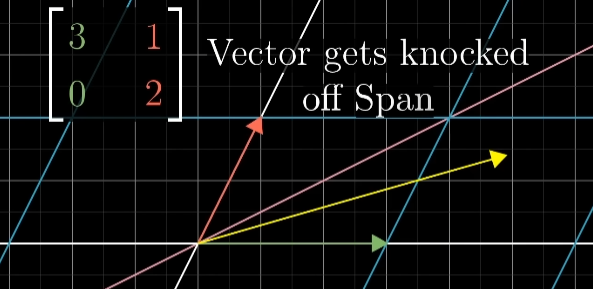

- some vectors do remain on their span
- meaning the affect the matrix has on the vector is just to stretch or squish it, like a scalar

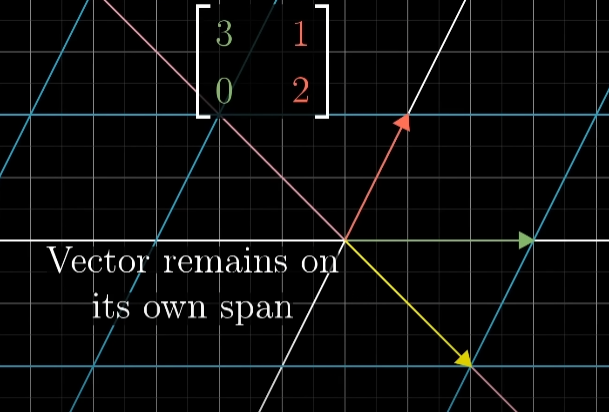

- in this example i hat (3,0) remains on its own span (the x axis) and the transformation in just to scale it up by 3.
- any other vector on the x axis remains on its own span
- Another vector that remains on its own span is (-1,1)
- (-1,1) gets stretched out by a factor of 2. Any other vector on that span also remains on its own span and stretched by a factor of 2
- Any other vector not on either of those spans are knocked off their own spans

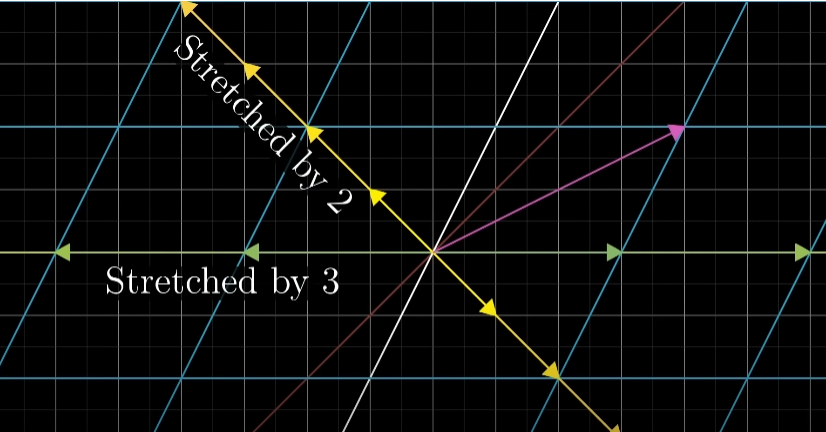

- These special vectors are called __Eigenvectors__
- The scaling effect of the transformation on the eigenvectors is the __Eigenvalue__

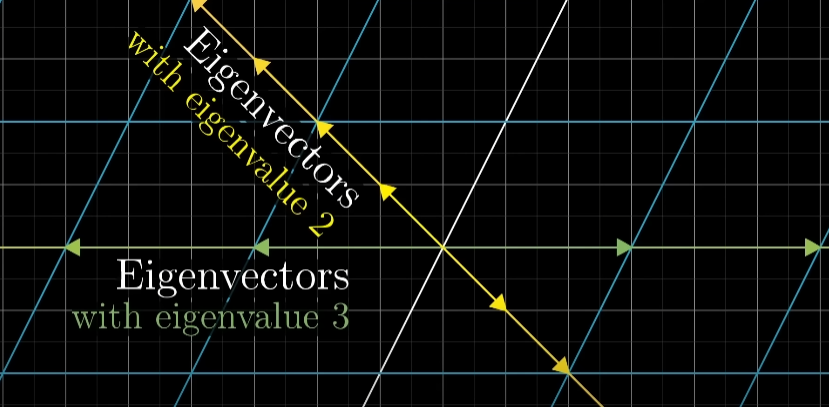

- If you can find an eigenvector for that rotation with an eigenvalue of 1, you have the __Axis of rotation__

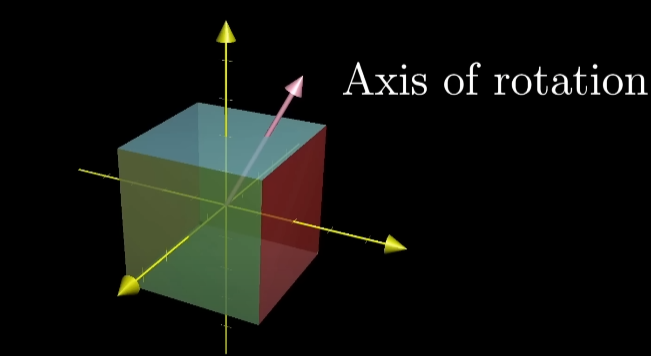

- A better way to get at the heart of what the Transformation actually does is to find the Eigenvalues and Eigenvectors
- Left side: Matrix-Vector Multiplication
- Right side: Scalar-Vector Multiplication

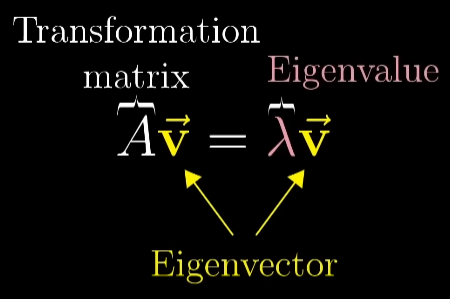

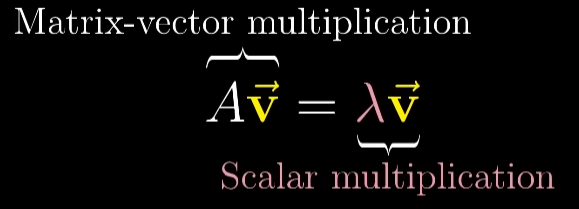

- Really lambda(Identity Matrix)* vector
- Now you have a new matrix (A - lamba(I))
- Now we are looking for a vector v, so that this new matrix * v is equal to 0
- We need the transformation to squish space to a lower dimension (the determinate of this new matrix needs to = 0)
- You want to tweak lambda so that the determinate is 0

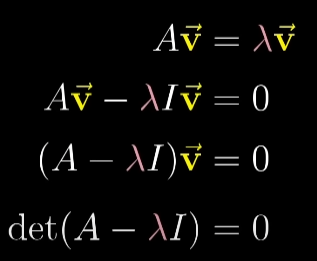

In this example we find the eigenvalues 2 or 3

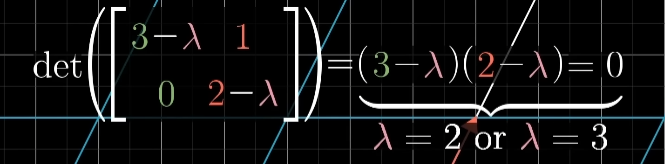

to find the eigenvector, 
- plug that value of lambda to the matrix
- then solve for which vectors this diagonally altered matrix sends to 0
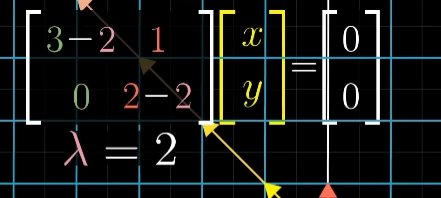

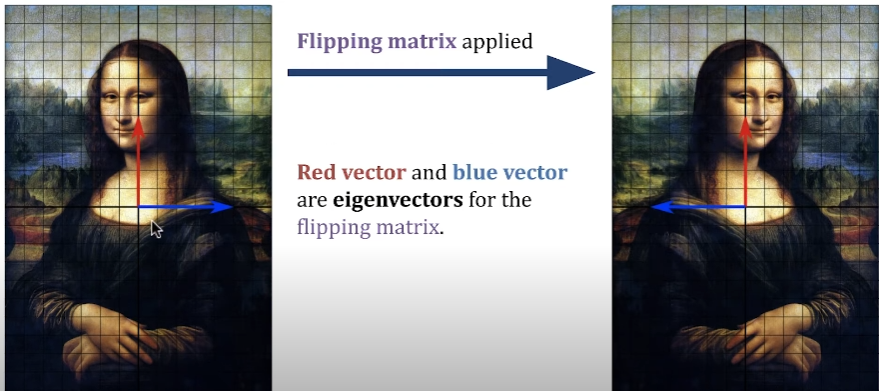

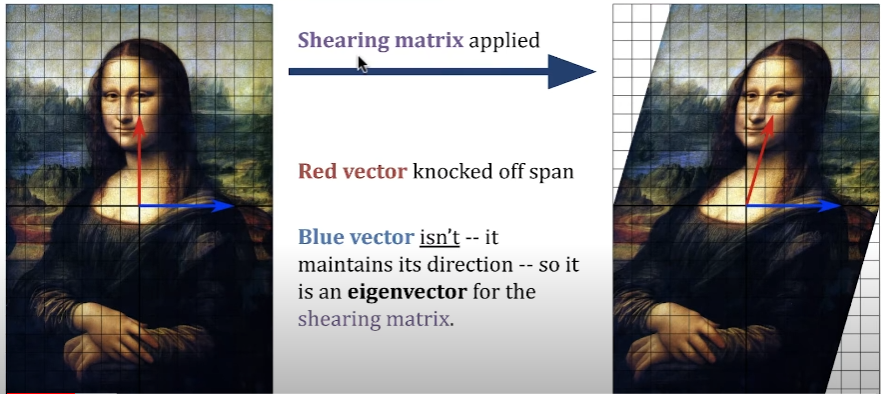

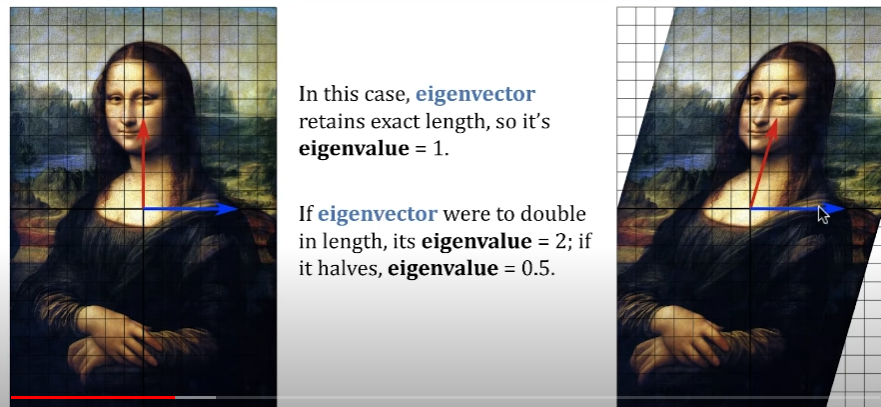

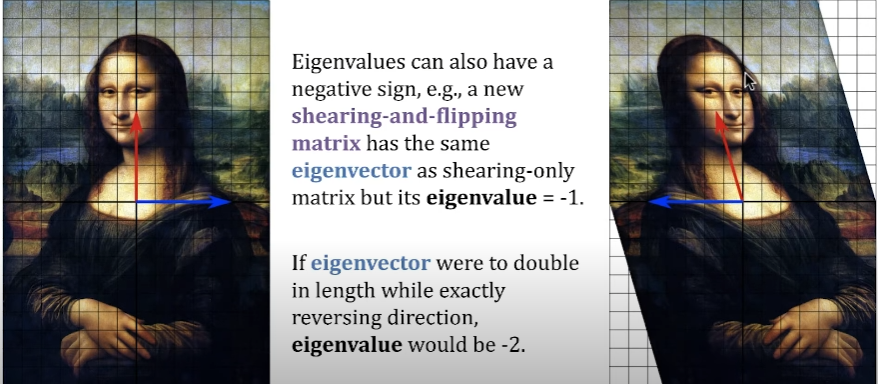

An eigenvector (eigen is German for "typical"; we could translate eigenvector to "characteristic vector") is a special vector v
 such that when it is transformed by some matrix (let's say A
), the product Av
 has the exact same direction as v
.

An eigenvalue is a scalar (traditionally represented as lambda
) that simply scales the eigenvector 
 such that the following equation is satisfied:
 
 Easiest way to understand this is to work through an example:

In [31]:
A

array([[-1,  4],
       [ 2, -2]])

We'll cheat with NumPy eig() method, which returns a tuple of:
- a vector of eigenvalues
- a matrix of eigenvectors

In [32]:
lambdas, V = np.linalg.eig(A) 

In [33]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [34]:
lambdas

array([ 1.37228132, -4.37228132])

In [35]:
v = V[:,0] # first eigenvector
v

array([0.86011126, 0.51010647])

In [36]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [37]:
Av = np.dot(A, v) #matrix * eigenvector
Av

array([1.18031462, 0.70000958])

In [38]:
lambduh * v # eigenvalue * eigenvector

array([1.18031462, 0.70000958])

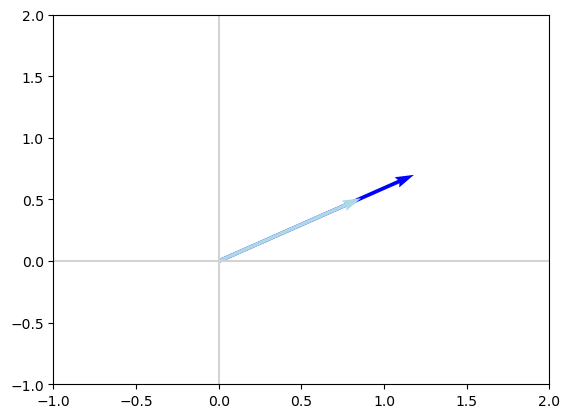

In [39]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

- the eigenvector is light blue and it is scaled by its eigenvalue (1.18)

In [40]:
v2 = V[:,1] # second eigenvector
v2

array([-0.76454754,  0.64456735])

In [41]:
lambda2 = lambdas[1] # second eigenvalue
lambda2

-4.372281323269014

In [42]:
Av2 = np.dot(A, v2) # matrix * 2nd eigenvector
Av2

array([ 3.34281692, -2.81822977])

In [43]:
lambda2 * v2 #2nd eigenvalue * 2nd eigenvector

array([ 3.34281692, -2.81822977])

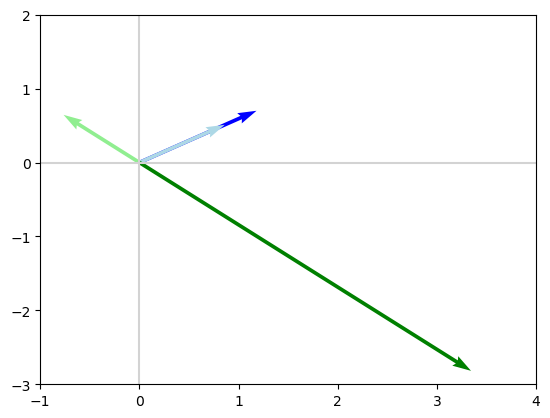

In [44]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

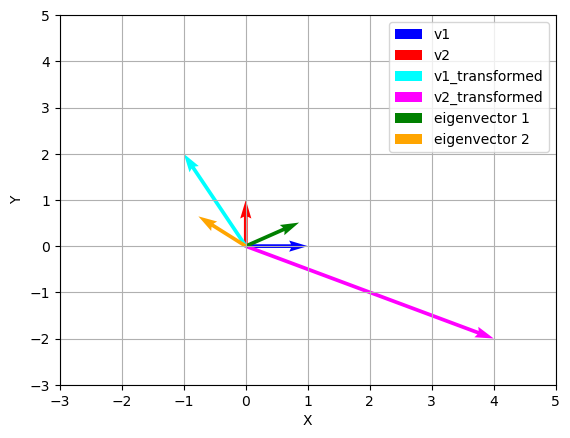

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([[-1, 4], [2, -2]])

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

# Extract the eigenvectors
v1_eigenvector = eigenvectors[:, 0]
v2_eigenvector = eigenvectors[:, 1]




# Original vectors
plt.quiver(0, 0, 1, 0, angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
plt.quiver(0, 0, 0, 1, angles='xy', scale_units='xy', scale=1, color='red', label='v2')

# Transformed vectors
plt.quiver(0, 0, A[0, 0], A[1, 0], angles='xy', scale_units='xy', scale=1, color='cyan', label='v1_transformed')
plt.quiver(0, 0, A[0, 1], A[1, 1], angles='xy', scale_units='xy', scale=1, color='magenta', label='v2_transformed')

# Plot the eigenvectors
plt.quiver(0, 0, v1_eigenvector[0], v1_eigenvector[1], angles='xy', scale_units='xy', scale=1, color='green', label='eigenvector 1')
plt.quiver(0, 0, v2_eigenvector[0], v2_eigenvector[1], angles='xy', scale_units='xy', scale=1, color='orange', label='eigenvector 2')

plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


## Determinate

- how much the Area is scaled for example (6)

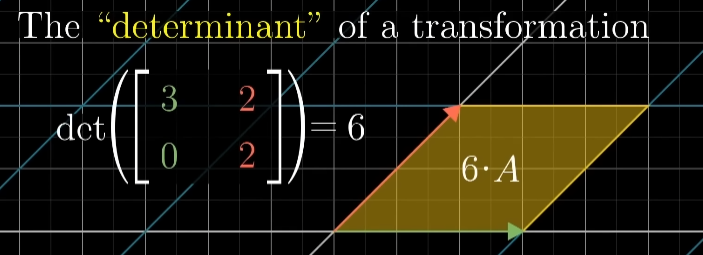

- if det = 0, that means it has been "squished" to a lower dimension

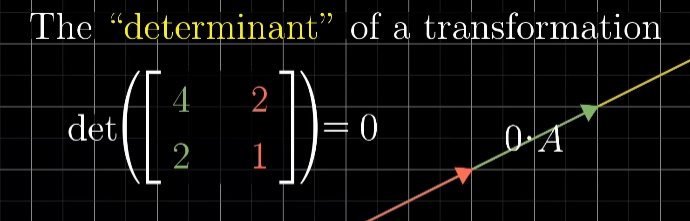

- a negative det just mean that the space is "flipped" over
- in 3d this is the volume vs the area that is being scaled

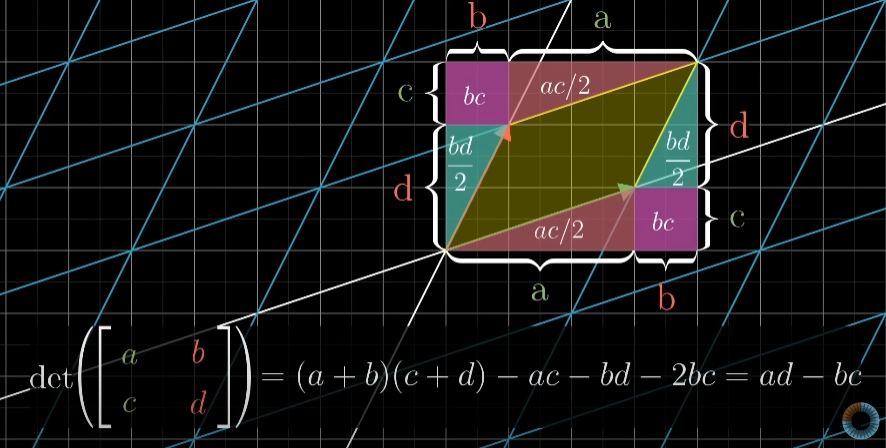

- Map a square matrix to scalar
- Enable us to determine whether matrix can be inverted

- For matrix X, denoted as det(X)
- If det(X) = 0: Inverse Matrix can't be computed because inverse X has 1/det(x) == 1/0, Matrix X is singular: linearly dependent columns
- det(X) easiest to calculate for 2x2 matrix


In [52]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [53]:
np.linalg.det(X)

-2.0000000000000013

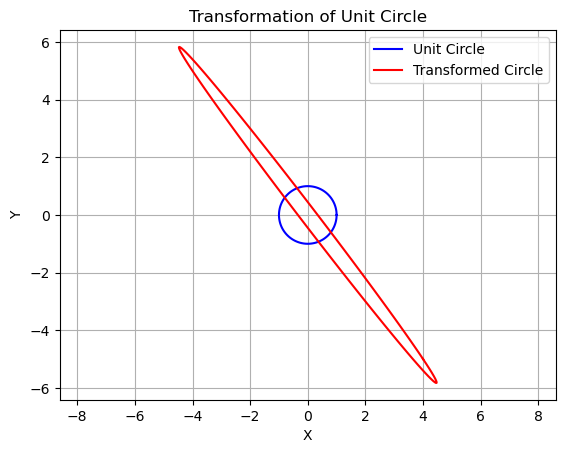

Since the determinate is -2.0000000000000013 the Unit circle has been scaled accordingly


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([[4, 2], [-5, -3]])

# Generate points on the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Create the points of the unit circle as a matrix
unit_circle = np.vstack((x, y))

# Apply the matrix transformation to the unit circle
transformed_circle = A.dot(unit_circle)

# Plot the original unit circle
plt.plot(x, y, color='blue', label='Unit Circle')

# Plot the transformed unit circle
plt.plot(transformed_circle[0], transformed_circle[1], color='red', label='Transformed Circle')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Transformation of Unit Circle')
plt.legend()
plt.grid()
plt.axis('equal')  # Ensure equal scaling of x and y axes
plt.show()

if np.linalg.det(X) != 0:
    print(f"Since the determinate is {np.linalg.det(A)} the Unit circle has been scaled accordingly")
else:
    print("Since the determinate is 0, the Unit circle has been squished to a lower dimension (1d line)")

In [68]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [69]:
np.linalg.det(N)

0.0

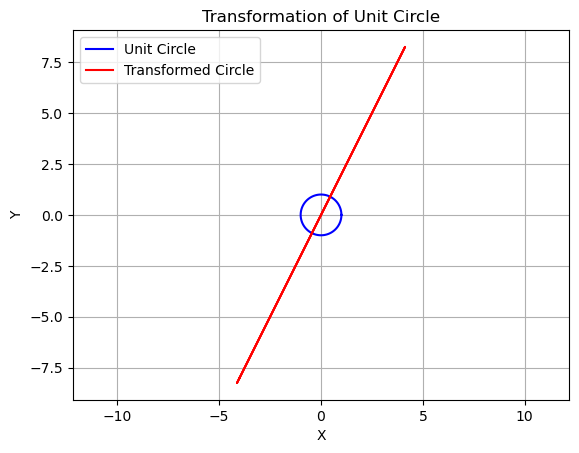

Since the determinate is 0, the Unit circle has been squished to a lower dimension (1d line)


In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix
A = np.array([[-4, 1], [-8, 2]])

# Generate points on the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

# Create the points of the unit circle as a matrix
unit_circle = np.vstack((x, y))

# Apply the matrix transformation to the unit circle
transformed_circle = A.dot(unit_circle)

# Plot the original unit circle
plt.plot(x, y, color='blue', label='Unit Circle')

# Plot the transformed unit circle
plt.plot(transformed_circle[0], transformed_circle[1], color='red', label='Transformed Circle')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Transformation of Unit Circle')
plt.legend()
plt.grid()
plt.axis('equal')  # Ensure equal scaling of x and y axes
plt.show()
if np.linalg.det(A) != 0:
    print(f"Since the determinate is {np.linalg.det(X)} the Unit circle has been scaled accordingly")
else:
    print("Since the determinate is 0, the Unit circle has been squished to a lower dimension (1d line)")

## Determinants of Larger Matrices

### Generalizing Determinants: Recursion

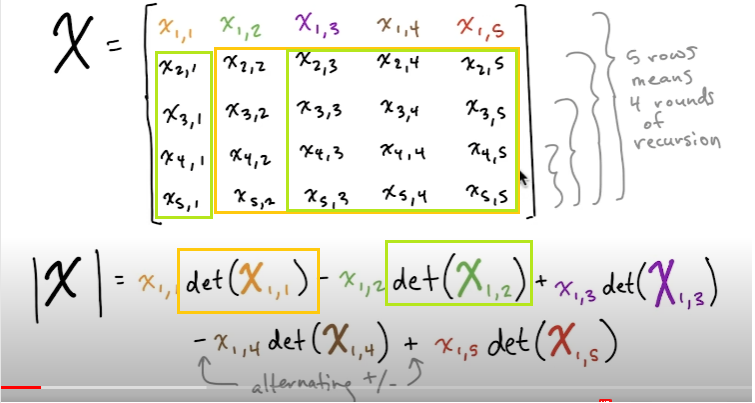

- 4 rounds of recursion
- determine determinate  2 x 2 matricies in the bottom two rows
- use those results to calculate det for 3 x 3 matricies
- then 4x4, then 5x5

In [75]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [76]:
np.linalg.det(X)

19.999999999999996

In [102]:
a1 = np.array([[-1,3],[5,1]])
print(a1)
deta1 = np.linalg.det(a1)
deta1

[[-1  3]
 [ 5  1]]


-15.999999999999998

In [103]:
b1 = np.array([[2,3],[0,1]])

print(b1)
detb1 = np.linalg.det(b1)
detb1

[[2 3]
 [0 1]]


2.0

In [104]:
c1 = np.array([[2,-1],[0,5]])
print(c1)
detc1 = np.linalg.det(c1)
detc1

[[ 2 -1]
 [ 0  5]]


9.999999999999998

In [105]:
detX= 1*deta1 - 2*detb1 + 4*detc1 # 1,2 4 come from the first row in our matrix X

In [101]:
print(detX)

19.999999999999993


### Determinants & Eigenvalues

det(X) = product of all eigenvalues of X
- lambda1 x lambda2 x lambda3 ... = det(X)

In [106]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [107]:
np.product(lambdas)

19.99999999999999

In [108]:
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [111]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

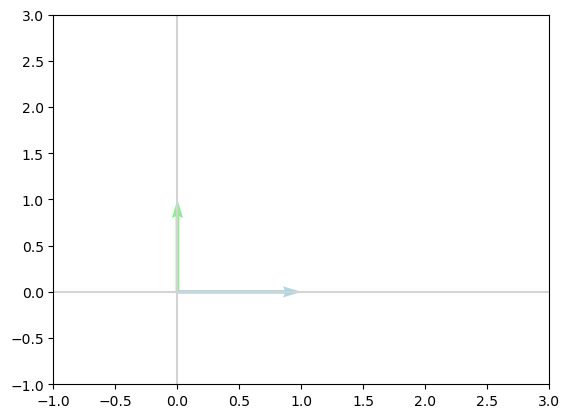

In [114]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)

_ = plt.ylim(-1, 3)

In [115]:
N

array([[-4,  1],
       [-8,  2]])

In [116]:
np.linalg.det(N)

0.0

In [117]:
NB = np.dot(N, B)
NB

array([[-4,  1],
       [-8,  2]])

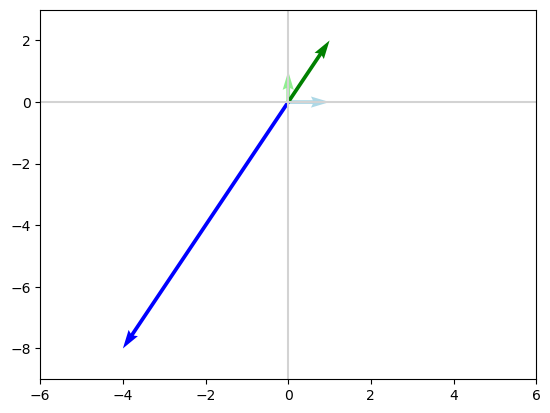

In [118]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [119]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

Aha! If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.

In [120]:
I

array([[1, 0],
       [0, 1]])

In [121]:
np.linalg.det(I)

1.0

In [122]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

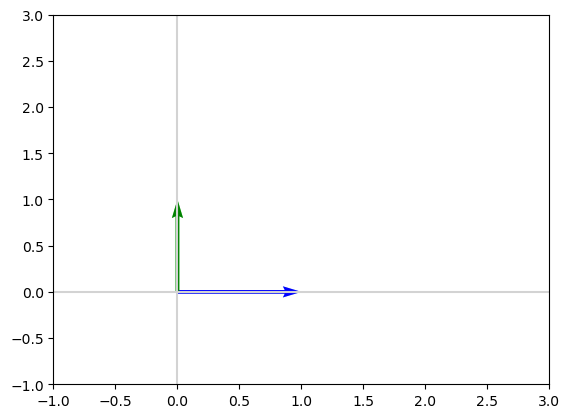

In [123]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix 
 which is more interesting:

In [124]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [125]:
np.linalg.det(J)

-1.0

In [126]:
np.abs(np.linalg.det(J))

1.0

In [127]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

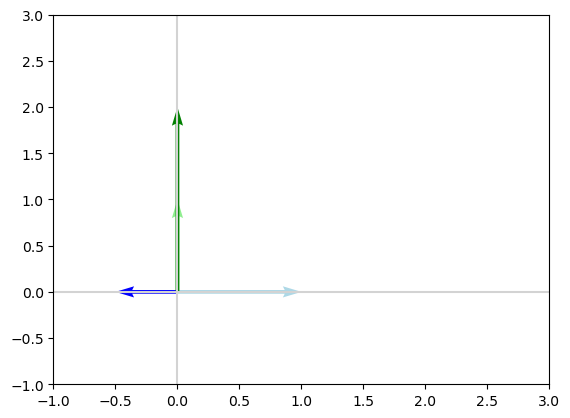

In [128]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [129]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

The unit square retained an area of 1 because the product of it's eigenvalues is = 1

In [130]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [131]:
np.linalg.det(D)

4.0

In [132]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

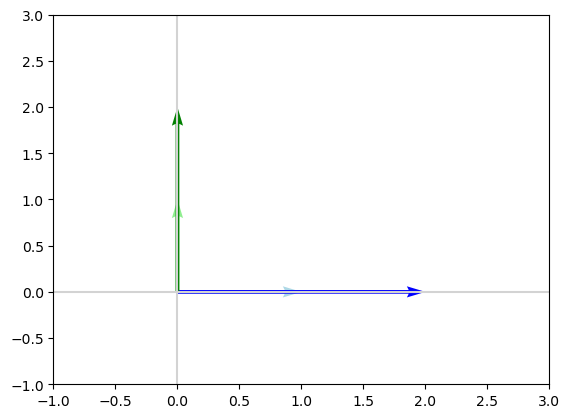

In [133]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

The vectors remain on their span but are scaled up by 2 and we can predict that the eigenvalues will both be 2

- lambda * lambda = det(X)
- 2lambda = 4
- lambda = 4/2
- lambda = 2

In [134]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

## Eigendecomposition
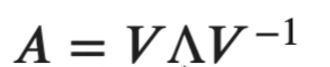

The decomposition of a matrix into eigenvectors and eigenvalues reveals characteristics of the matrix
- The Matrix is singular if and only if any of its eigenvalues are 0 , which also means its determinant is 0
- Under specific conditions can optimize quadratic expressions:
- - Max of f(x) = largest eigenvalue
- - Min of f(x) = smallest eigenvalue

- V is the concatenation of all the eigenvectors of A
- Upper Lambda is the diagonal matrix diag(lambda). Note that the convention is too arrange the lambda values in descending order, as a result the first eigenvalue(and its eigenvector) may be a primary characteristic of matrix A


In [135]:
# This was used earlier as a matrix X; it has nice clean integer eigenvalues...
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [136]:
lambdas, V = np.linalg.eig(A)

In [137]:
V # Eigenvectors of matrix A

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [138]:
Vinv = np.linalg.inv(V)
Vinv # Inverse of Eigenvectors

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [139]:
Lambda = np.diag(lambdas)
Lambda # Eigenvalues of matrix A

array([[ 2.,  0.],
       [ 0., -1.]])

In [142]:
np.dot(V, np.dot(Lambda, Vinv)) 
# Dot product of Eigenvectors * Dot product of Eigenvalues and inverse Eigenvectors which is equal to the Matrix A

array([[ 4.,  2.],
       [-5., -3.]])

In [143]:
A = np.array([[4, 2],
              [-5, -3]])


Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If A
 is a real symmetric matrix then...